In [32]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

In [33]:
data_1 = pd.read_csv('train.csv')

In [34]:
data_1.head()

,image_names,class
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,1
3,000004.jpg,0
4,000005.jpg,0


In [35]:
data_2 = pd.read_csv('test.csv')

In [36]:
data_2.head()

,image_names
0,000001.jpg
1,000002.jpg
2,000003.jpg
3,000004.jpg
4,000005.jpg


In [37]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [38]:
# distribution of classes in the dataset
data_1['class'].value_counts()

class
0    5795
1    4202
Name: count, dtype: int64

In [39]:
# empty list to store the images
X = []
# iterating over each image
for img_name in data_1.image_names:
    # loading the image using its name
    img = plt.imread('images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data_1['class'].values
#y = data_1.class.values

In [40]:
# shape of the image
X.shape

(9997, 218, 178, 3)

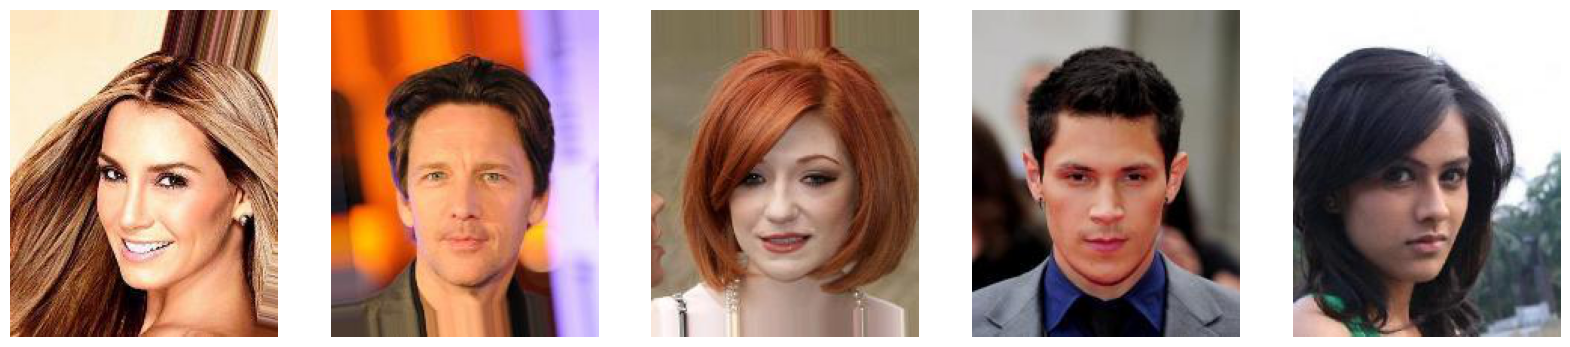

In [41]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

In [43]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 218*178*3)
X.shape

(9997, 116412)

In [44]:
X.min(), X.max()

(0, 255)

In [45]:
X.min(), X.max()

(0, 255)

In [27]:
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [28]:
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((6997, 218, 178, 3), (6997,)), ((3000, 218, 178, 3), (3000,)))

In [30]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense

# Defining the architecture of the model
model = Sequential()
model.add(InputLayer(shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))


In [31]:
# summary of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │          21,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,001 (85.94 KB)

 Trainable params: 22,001 (85.94 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [35]:
# training the model
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1_1/Cast:0", shape=(None, 218, 178, 3), dtype=float32). Expected shape (None, 218), but input has incompatible shape (None, 218, 178, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 218, 178, 3), dtype=uint8)
  • training=True
  • mask=None